In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 데이터셋 불러오기
customer = pd.read_csv('/content/drive/MyDrive/customer.csv')
product = pd.read_csv('/content/drive/MyDrive/product.csv', on_bad_lines='skip')
transaction = pd.read_csv('/content/drive/MyDrive/transaction_new.csv')
click = pd.read_csv('/content/drive/MyDrive/click_stream_new.csv')
click_tt = pd.read_csv('/content/drive/MyDrive/click_tt.csv')

In [3]:
transaction

,created_at,customer_id,booking_id,session_id,payment_method,payment_status,promo_amount,promo_code,shipment_fee,shipment_date_limit,shipment_location_lat,shipment_location_long,total_amount,product_id,quantity,item_price
0,2018-07-29T15:22:01.458193Z,5868,186e2bee-0637-4710-8981-50c2d737bc42,3abaa6ce-e320-4e51-9469-d9f3fa328e86,Debit Card,Success,1415,WEEKENDSERU,10000,2018-08-03T05:07:24.812676Z,-8.227893,111.969107,199832,54728,1,191247
1,2018-07-30T12:40:22.365620Z,4774,caadb57b-e808-4f94-9e96-8a7d4c9898db,2ee5ead1-f13e-4759-92df-7ff48475e970,Credit Card,Success,0,NaN,10000,2018-08-03T01:29:03.415705Z,3.013470,107.802514,155526,16193,1,145526
2,2018-09-15T11:51:17.365620Z,4774,6000fffb-9c1a-4f4a-9296-bc8f6b622b50,93325fb6-eb00-4268-bb0e-6471795a0ad0,OVO,Success,0,NaN,10000,2018-09-18T08:41:49.422380Z,-2.579428,115.743885,550696,53686,4,135174
3,2018-11-01T11:23:48.365620Z,4774,f5e530a7-4350-4cd1-a3bc-525b5037bcab,bcad5a61-1b67-448d-8ff4-781d67bc56e4,Credit Card,Success,0,NaN,0,2018-11-05T17:42:27.954235Z,-3.602334,120.363824,271012,20228,1,271012
4,2018-12-18T11:20:30.365620Z,4774,0efc0594-dbbf-4f9a-b0b0-a488cfddf8a2,df1042ab-13e6-4072-b9d2-64a81974c51a,Credit Card,Success,0,NaN,0,2018-12-23T17:24:07.361785Z,-3.602334,120.363824,198753,55220,1,198753
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254580,2021-09-21T22:10:05.074873Z,25121,66f02fa4-c62e-497a-8b6e-be239009b50a,484eecde-9f4a-42de-a8df-7ce6668101f4,Debit Card,Failed,0,NaN,0,2021-09-27T00:43:40.992167Z,-6.869535,111.077145,226820,30642,2,113410
1254581,2021-12-09T07:35:18.222046Z,34829,ccde6b83-ee42-4cce-b2cd-976574886eac,954e1211-4d45-4d0b-ba84-53e80119592c,OVO,Success,5010,AZ2022,10000,2021-12-12T07:52:44.803822Z,-8.677264,115.176947,359203,19394,1,354213
1254582,2021-12-11T01:20:36.944593Z,99645,5bcd3434-1dc6-44bb-ae63-fd19714cbd6c,e6e6c108-abd0-49a2-b0a5-691117f9cfe1,Credit Card,Success,2181,WEEKENDSERU,5000,2021-12-12T13:28:22.848703Z,-6.185498,106.831093,1158159,13079,4,288835
1254583,2019-12-18T11:01:09.623382Z,87319,af7f291a-b01b-4bfd-89a9-237b16368b15,bb6e5426-a3f3-426a-b99d-79173eaa234b,Credit Card,Success,4503,AZ2022,0,2019-12-23T22:56:46.831720Z,-7.155977,110.891858,184143,11312,1,188646


In [4]:
click

,session_id,event_name,event_time,event_id,traffic_source,product_id,quantity,item_price,payment_status,search_keywords,promo_code,promo_amount
0,fb0abf9e-fd1a-44dd-b5c0-2834d5a4b81c,HOMEPAGE,2019-09-06T15:54:32.821085Z,9c4388c4-c95b-4678-b5ca-e9cbc0734109,MOBILE,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,fb0abf9e-fd1a-44dd-b5c0-2834d5a4b81c,SCROLL,2019-09-06T16:03:57.821085Z,4690e1f5-3f99-42d3-84a5-22c4c4d8500a,MOBILE,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,7d440441-e67a-4d36-b324-80ffd636d166,HOMEPAGE,2019-09-01T12:05:10.322763Z,88aeaeb5-ec98-4859-852c-8abb483faf31,MOBILE,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,7d440441-e67a-4d36-b324-80ffd636d166,ADD_TO_CART,2019-09-01T12:06:33.322763Z,934e306e-ecc6-472f-9ccb-12c8536910a2,MOBILE,15315.0,4.0,313529.0,NaN,NaN,NaN,NaN
4,7d440441-e67a-4d36-b324-80ffd636d166,BOOKING,2019-09-01T12:15:29.425431Z,9f4767a1-40fa-4c9c-9524-dfad18634d56,MOBILE,NaN,NaN,NaN,Success,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
12833597,ad1063b0-a6e5-40a9-aed6-d1b45741e571,SEARCH,2021-06-07T04:37:53.354381Z,4b3b91a5-9bda-44de-87dc-153367071dfc,MOBILE,NaN,NaN,NaN,NaN,Bekas,NaN,NaN
12833598,64585e37-3fe7-48d7-b79b-ebcb70230eb2,HOMEPAGE,2021-05-05T11:44:14.985835Z,ab0acc87-9578-408a-b47f-c46996b8b52f,MOBILE,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12833599,64585e37-3fe7-48d7-b79b-ebcb70230eb2,ADD_TO_CART,2021-05-05T11:53:10.985835Z,230d7b67-9934-42f9-9509-b330ac6ae777,MOBILE,19820.0,1.0,88918.0,NaN,NaN,NaN,NaN
12833600,64585e37-3fe7-48d7-b79b-ebcb70230eb2,BOOKING,2021-05-05T12:10:09.135142Z,8996ce49-c5dd-41ed-9231-28bfdb634cbe,MOBILE,NaN,NaN,NaN,Success,NaN,NaN,NaN


In [5]:
customer

,customer_id,first_name,last_name,username,email,gender,birthdate,device_type,device_id,device_version,home_location_lat,home_location_long,home_location,home_country,first_join_date
0,2870,Lala,Maryati,671a0865-ac4e-4dc4-9c4f-c286a1176f7e,671a0865_ac4e_4dc4_9c4f_c286a1176f7e@startupca...,F,1996-06-14,iOS,c9c0de76-0a6c-4ac2-843f-65264ab9fe63,iPhone; CPU iPhone OS 14_2_1 like Mac OS X,-1.043345,101.360523,Sumatera Barat,Indonesia,2019-07-21
1,8193,Maimunah,Laksmiwati,83be2ba7-8133-48a4-bbcb-b46a2762473f,83be2ba7_8133_48a4_bbcb_b46a2762473f@zakyfound...,F,1993-08-16,Android,fb331c3d-f42e-40fe-afe2-b4b73a8a6e25,Android 2.2.1,-6.212489,106.818850,Jakarta Raya,Indonesia,2017-07-16
2,7279,Bakiman,Simanjuntak,3250e5a3-1d23-4675-a647-3281879d42be,3250e5a3_1d23_4675_a647_3281879d42be@startupca...,M,1989-01-23,iOS,d13dde0a-6ae1-43c3-83a7-11bbb922730b,iPad; CPU iPad OS 4_2_1 like Mac OS X,-8.631607,116.428436,Nusa Tenggara Barat,Indonesia,2020-08-23
3,88813,Cahyadi,Maheswara,df797edf-b465-4a80-973b-9fbb612260c2,df797edf_b465_4a80_973b_9fbb612260c2@zakyfound...,M,1991-01-05,iOS,f4c18515-c5be-419f-8142-f037be47c9cd,iPad; CPU iPad OS 14_2 like Mac OS X,1.299332,115.774934,Kalimantan Timur,Indonesia,2021-10-03
4,82542,Irnanto,Wijaya,36ab08e1-03de-42a8-9e3b-59528c798824,36ab08e1_03de_42a8_9e3b_59528c798824@startupca...,M,2000-07-15,iOS,e46e4c36-4630-4736-8fcf-663db29ca3b0,iPhone; CPU iPhone OS 10_3_3 like Mac OS X,-2.980807,114.924675,Kalimantan Selatan,Indonesia,2021-04-11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,34743,Manah,Mustofa,bf989ab1-d7eb-4ad5-b4bc-29e3cf69b35c,bf989ab1_d7eb_4ad5_b4bc_29e3cf69b35c@startupca...,M,2000-11-17,Android,fa1914a5-0c12-4393-8d6c-af4e4a4de6aa,Android 4.3.1,-5.203523,105.635530,Lampung,Indonesia,2020-10-17
99996,72065,Danu,Pradana,4af2b3d5-c573-4032-b29c-24782745a2f6,4af2b3d5_c573_4032_b29c_24782745a2f6@startupca...,M,1998-03-30,Android,d8234d67-6954-4e05-8293-d37ef25bfd7e,Android 8.0.0,4.474702,95.904876,Aceh,Indonesia,2017-11-25
99997,32818,Talia,Aryani,af0edbfa-f354-4765-813b-b9f151022555,af0edbfa_f354_4765_813b_b9f151022555@startupca...,F,1993-01-12,Android,3c586f64-aab7-4dd6-be94-5d47c6361081,Android 11,-3.330376,127.028348,Maluku,Indonesia,2018-09-01
99998,75597,Ajimat,Mansur,35cd82f3-6b86-42a2-bb15-933770d7f250,35cd82f3_6b86_42a2_bb15_933770d7f250@startupca...,M,2000-09-13,Android,3b209c58-d305-4b46-9363-b90a3914f008,Android 7.1,-2.173114,101.495913,Jambi,Indonesia,2020-05-31


In [6]:
merged_transaction = pd.merge(transaction, customer, on="customer_id")
promo_ratio_by_customer = merged_transaction.groupby("customer_id")["promo_code"].apply(lambda x: (~x.isnull()).mean())
promo_ratio_by_customer
promo_ratio_df = pd.DataFrame({
    "customer_id": promo_ratio_by_customer.index,
    "promo_ratio": promo_ratio_by_customer.values
})
promo_ratio_df

,customer_id,promo_ratio
0,3,0.535211
1,8,0.125000
2,9,0.000000
3,11,1.000000
4,15,0.444444
...,...,...
50700,99992,0.117647
50701,99995,0.240506
50702,99997,0.000000
50703,99998,0.875000


In [7]:
total_transaction = merged_transaction.groupby("customer_id")["total_amount"].sum()
total_transaction_df = pd.DataFrame({
    "customer_id": total_transaction.index,
    "total_transaction": total_transaction.values
})
total_transaction_df

,customer_id,total_transaction
0,3,45842098
1,8,4758601
2,9,4113630
3,11,197533
4,15,6447246
...,...,...
50700,99992,14033384
50701,99995,58958135
50702,99997,226461
50703,99998,70563417


In [8]:
avg_transaction = round(merged_transaction.groupby("customer_id")["total_amount"].mean())
avg_transaction_df = pd.DataFrame({
    "customer_id": avg_transaction.index,
    "avg_transaction": avg_transaction.values
})
avg_transaction_df

,customer_id,avg_transaction
0,3,645663.0
1,8,594825.0
2,9,514204.0
3,11,197533.0
4,15,716361.0
...,...,...
50700,99992,825493.0
50701,99995,746306.0
50702,99997,226461.0
50703,99998,2940142.0


In [9]:
count_transaction = transaction.customer_id.value_counts()
count_transaction_df = pd.DataFrame({
    "customer_id": count_transaction.index,
    "count_transaction": count_transaction.values
})
count_transaction_df

,customer_id,count_transaction
0,43202,807
1,29496,749
2,82237,716
3,10167,693
4,69740,673
...,...,...
50700,2934,1
50701,4363,1
50702,52112,1
50703,92794,1


In [10]:
avg_shipment_fee = round(merged_transaction.groupby("customer_id")["shipment_fee"].mean())
avg_shipment_fee_df = pd.DataFrame({
    "customer_id": avg_shipment_fee.index,
    "avg_shipment_fee": avg_shipment_fee.values
})
avg_shipment_fee_df

,customer_id,avg_shipment_fee
0,3,6972.0
1,8,6875.0
2,9,5625.0
3,11,15000.0
4,15,10000.0
...,...,...
50700,99992,10588.0
50701,99995,10316.0
50702,99997,10000.0
50703,99998,8958.0


In [11]:
avg_promo_amount = round(merged_transaction.groupby("customer_id")["promo_amount"].mean())
avg_promo_amount_df = pd.DataFrame({
    "customer_id": avg_promo_amount.index,
    "avg_promo_amount": avg_promo_amount.values
})
avg_promo_amount_df

,customer_id,avg_promo_amount
0,3,2583.0
1,8,962.0
2,9,0.0
3,11,9492.0
4,15,1818.0
...,...,...
50700,99992,732.0
50701,99995,1134.0
50702,99997,0.0
50703,99998,2485.0


In [12]:
product.rename(columns={'id': 'product_id'}, inplace=True)
merged_transaction = pd.merge(merged_transaction, product, on="product_id")
merged_transaction

,created_at,customer_id,booking_id,session_id,payment_method,payment_status,promo_amount,promo_code,shipment_fee,shipment_date_limit,...,first_join_date,gender_y,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
0,2018-07-29T15:22:01.458193Z,5868,186e2bee-0637-4710-8981-50c2d737bc42,3abaa6ce-e320-4e51-9469-d9f3fa328e86,Debit Card,Success,1415,WEEKENDSERU,10000,2018-08-03T05:07:24.812676Z,...,2018-07-28,Men,Footwear,Shoes,Casual Shoes,Black,Summer,2012.0,Casual,Vans Men Black Shoes
1,2021-01-15T19:52:40.793729Z,82831,81f60282-96c5-45f5-8a24-18e8111ccd08,c7d4a5a2-362b-4042-a971-a55f84e0619f,OVO,Success,0,NaN,10000,2021-01-18T16:37:55.894009Z,...,2016-10-01,Men,Footwear,Shoes,Casual Shoes,Black,Summer,2012.0,Casual,Vans Men Black Shoes
2,2020-06-04T14:54:13.726119Z,47013,a144e124-1ad6-425b-9f64-b01f05c697ff,141a3f3b-360e-4489-bc10-91528e9e1139,Gopay,Success,0,NaN,10000,2020-06-09T17:53:51.385567Z,...,2018-07-21,Men,Footwear,Shoes,Casual Shoes,Black,Summer,2012.0,Casual,Vans Men Black Shoes
3,2019-02-05T08:29:50.613535Z,17135,e620a19d-982d-4fc2-9715-29fda7f42269,aadf43f6-59be-4b2f-9338-ccec0b2abf40,Credit Card,Success,0,NaN,0,2019-02-07T23:03:17.353912Z,...,2017-10-01,Men,Footwear,Shoes,Casual Shoes,Black,Summer,2012.0,Casual,Vans Men Black Shoes
4,2020-11-04T14:20:44.351064Z,70185,bbe1053a-9738-4438-bea4-0a3abcaf6afb,ae213ea2-c5bb-45aa-8a27-820d33c873aa,Gopay,Success,0,NaN,10000,2020-11-09T16:53:37.994163Z,...,2017-07-22,Men,Footwear,Shoes,Casual Shoes,Black,Summer,2012.0,Casual,Vans Men Black Shoes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1253961,2021-01-15T14:09:04.388337Z,9486,a48ea0d8-617a-4ee0-9f4a-49c5ef9cf39a,848ef48a-d693-4677-bde7-8e7664c62319,Credit Card,Success,2179,AZ2022,10000,2021-01-19T16:21:12.504685Z,...,2019-11-18,Men,Footwear,Shoes,Sports Shoes,Black,Summer,2011.0,Sports,Puma Men's Future Cat Engine Black Shoe
1253962,2017-12-18T22:39:03.425067Z,30710,9a1520a1-a1c6-497e-93b5-7c8d87aa6f33,381feb63-e5ac-4cb4-823d-c7f1547c1be9,Gopay,Success,0,NaN,10000,2017-12-23T03:51:53.957263Z,...,2017-12-17,Men,Footwear,Shoes,Sports Shoes,Black,Summer,2011.0,Sports,Puma Men's Future Cat Engine Black Shoe
1253963,2022-03-14T22:04:05.857842Z,86532,ffa8ca45-82f3-4c62-85cc-c303c805590e,97c71ce8-e94c-4cf2-948a-1c80d871ed4d,Credit Card,Success,11957,XX2022,10000,2022-03-18T15:43:22.155994Z,...,2020-10-01,Men,Footwear,Shoes,Sports Shoes,Black,Summer,2011.0,Sports,Puma Men's Future Cat Engine Black Shoe
1253964,2020-09-11T01:57:40.983766Z,83374,a4b105ee-4dd6-4b32-9412-2e092e5bcda1,c98e89d1-5b19-456b-ab53-a7da4962a290,Credit Card,Success,0,NaN,10000,2020-09-16T02:36:59.288888Z,...,2019-08-02,Men,Footwear,Shoes,Sports Shoes,Black,Summer,2011.0,Sports,Puma Men's Future Cat Engine Black Shoe


In [13]:
transaction['created_at'] = pd.to_datetime(transaction['created_at'])
df = transaction.sort_values(by='created_at', ascending=False)
df.drop_duplicates(subset='customer_id', keep='first', inplace=True)
df = df[['customer_id', 'created_at']]
df

,customer_id,created_at
985570,19551,2022-07-31 23:59:45.821469+00:00
985766,22285,2022-07-31 23:59:03.408424+00:00
985628,81975,2022-07-31 23:58:50.469277+00:00
985909,27522,2022-07-31 23:58:07.937208+00:00
985637,15753,2022-07-31 23:58:06.292816+00:00
...,...,...
1097795,9914,2016-07-04 18:10:42.766218+00:00
1227363,22844,2016-07-04 00:58:13.525069+00:00
817471,67563,2016-07-03 16:25:01.401472+00:00
1227432,30771,2016-07-02 20:01:04.996529+00:00


In [14]:
# 중고 결제 데이터

merged_tt = pd.merge(click_tt, transaction, on="session_id")
sh = merged_tt[['customer_id', 'session_id', 'created_at', 'payment_method', 'payment_status', 'promo_amount', 'promo_code', 'total_amount', 'product_id', 'quantity', 'item_price']]
sh.drop_duplicates(subset=['customer_id', 'session_id', 'created_at'], keep='first', inplace=True)
sh

<ipython-input-14-62b76cbc9975>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sh.drop_duplicates(subset=['customer_id', 'session_id', 'created_at'], keep='first', inplace=True)


,customer_id,session_id,created_at,payment_method,payment_status,promo_amount,promo_code,total_amount,product_id,quantity,item_price
0,78259,00007415-e0e7-4a33-95e8-5bc749016876,2022-07-24 13:16:40.038087+00:00,Credit Card,Success,0,NaN,195528,41309,1,195528
1,8544,0000b1a6-8dca-4fb3-b1db-ccde1791a330,2021-02-10 00:23:22.386424+00:00,Gopay,Success,0,NaN,172017,19353,1,147017
2,42813,00011e77-643b-49ba-b09d-c5a64f7683b4,2018-05-26 01:56:59.211903+00:00,OVO,Success,0,NaN,844206,13044,2,422103
3,90162,00013ac1-f66e-492c-ac04-4e0f1ecf2ff8,2020-02-16 22:33:24.777605+00:00,Credit Card,Success,0,NaN,429328,5998,1,419328
6,63595,00016815-cf29-45fa-8974-17c6796aab29,2021-04-30 15:55:09.180746+00:00,OVO,Success,0,NaN,164229,2219,1,164229
...,...,...,...,...,...,...,...,...,...,...,...
326586,10455,ffff153d-ae1f-4fe2-af05-f2803580b5e4,2018-02-19 18:31:13.431409+00:00,Debit Card,Success,4366,BUYMORE,576773,18629,3,193713
326587,36369,ffff284a-9364-4296-a758-e3b0b4297f6d,2017-03-29 19:00:20.013557+00:00,Debit Card,Success,4218,AZ2022,234927,45895,1,155308
326589,8649,ffff633b-91cf-45f8-b9f7-768ad414d3b1,2019-10-05 12:35:22.933551+00:00,Credit Card,Success,0,NaN,818023,22066,1,128412
326592,65771,ffffdf8e-dea1-42bc-9839-7662675c0d38,2020-11-11 14:59:29.117552+00:00,Credit Card,Success,0,NaN,359771,22290,1,349771


In [15]:
secondhand = sh['customer_id'].value_counts()
secondhand_df = pd.DataFrame({
    "customer_id": secondhand.index,
    "secondhand": secondhand.values
})
secondhand_df

,customer_id,secondhand
0,43202,166
1,10167,140
2,82237,137
3,29240,128
4,38588,113
...,...,...
29147,86993,1
29148,70559,1
29149,23482,1
29150,54977,1


In [16]:
masterCategory = merged_transaction.groupby('customer_id')['masterCategory'].apply(lambda x: x.value_counts().idxmax())
masterCategory_df = pd.DataFrame({
    "customer_id": masterCategory.index,
    "most_masterC": masterCategory.values
})
masterCategory_df

,customer_id,most_masterC
0,3,Apparel
1,8,Apparel
2,9,Apparel
3,11,Accessories
4,15,Apparel
...,...,...
50695,99992,Apparel
50696,99995,Apparel
50697,99997,Accessories
50698,99998,Apparel


In [17]:
subCategory = merged_transaction.groupby('customer_id')['subCategory'].apply(lambda x: x.value_counts().idxmax())
subCategory_df = pd.DataFrame({
    "customer_id": subCategory.index,
    "most_subC": subCategory.values
})
subCategory_df

,customer_id,most_subC
0,3,Topwear
1,8,Topwear
2,9,Topwear
3,11,Bags
4,15,Topwear
...,...,...
50695,99992,Topwear
50696,99995,Topwear
50697,99997,Belts
50698,99998,Topwear


In [18]:
# 고객 데이터 추출

from datetime import datetime
import pytz

ci = customer[['customer_id', 'gender', 'birthdate', 'device_type', 'home_location', 'first_join_date']]
ci['birthdate'] = pd.to_datetime(ci['birthdate'])
ci['first_join_date'] = pd.to_datetime(ci['first_join_date'])
current_date = datetime(2022, 8, 1)
ci['age'] = (current_date - ci['birthdate']).dt.days // 365
ci['join'] = (current_date - ci['first_join_date']).dt.days // 365
ci = pd.merge(ci, masterCategory_df, on="customer_id", how='left')
ci = pd.merge(ci, subCategory_df, on="customer_id", how='left')
ci = pd.merge(ci, total_transaction_df, on="customer_id", how='left')
ci = pd.merge(ci, avg_transaction_df, on="customer_id", how='left')
ci = pd.merge(ci, count_transaction_df, on="customer_id", how='left')
ci = pd.merge(ci, promo_ratio_df, on="customer_id", how='left')
ci = pd.merge(ci, avg_promo_amount_df, on="customer_id", how='left')
ci = pd.merge(ci, avg_shipment_fee_df, on="customer_id", how='left')
ci = pd.merge(ci, secondhand_df, on="customer_id", how='left')
ci = pd.merge(ci, df, on="customer_id", how='left')
ci.rename(columns={'created_at': 'last_transaction'}, inplace=True)
cutoff_date = datetime(2022, 6, 30, tzinfo=pytz.UTC)
ci['turnover'] = (ci['last_transaction'] < cutoff_date).astype(int)
ci = ci.drop(columns=['birthdate', 'first_join_date', 'last_transaction'])
unique_customer_ids = transaction.customer_id.unique()
ci = ci[ci['customer_id'].isin(unique_customer_ids)]

<ipython-input-18-acc0aa289201>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ci['birthdate'] = pd.to_datetime(ci['birthdate'])
<ipython-input-18-acc0aa289201>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ci['first_join_date'] = pd.to_datetime(ci['first_join_date'])
<ipython-input-18-acc0aa289201>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.

In [19]:
ci

,customer_id,gender,device_type,home_location,age,join,most_masterC,most_subC,total_transaction,avg_transaction,count_transaction,promo_ratio,avg_promo_amount,avg_shipment_fee,secondhand,turnover
2,7279,M,iOS,Nusa Tenggara Barat,33,1,Apparel,Topwear,98661780.0,836117.0,118.0,0.194915,999.0,8856.0,27.0,0
4,82542,M,iOS,Kalimantan Selatan,22,1,Apparel,Topwear,115702.0,115702.0,1.0,0.000000,0.0,0.0,NaN,1
7,96453,F,Android,Bengkulu,17,0,Apparel,Topwear,400724.0,200362.0,2.0,0.500000,5302.0,10000.0,NaN,1
8,8031,F,iOS,Jawa Barat,26,2,Accessories,Bags,2711194.0,677798.0,4.0,1.000000,4570.0,7500.0,NaN,1
12,9152,F,iOS,Yogyakarta,26,2,Footwear,Shoes,521337.0,173779.0,3.0,0.666667,1723.0,10000.0,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99994,38690,F,Android,Riau,40,5,Apparel,Bags,3833461.0,547637.0,7.0,0.428571,2977.0,14286.0,NaN,1
99995,34743,M,Android,Lampung,21,1,Apparel,Topwear,26453036.0,587845.0,45.0,0.266667,1879.0,8889.0,13.0,0
99996,72065,M,Android,Aceh,24,4,Apparel,Topwear,59084450.0,1114801.0,53.0,0.264151,1486.0,8962.0,4.0,1
99997,32818,F,Android,Maluku,29,3,Apparel,Topwear,296679636.0,1889679.0,157.0,0.350318,1714.0,9459.0,27.0,0


In [20]:
ci['turnover'].value_counts(normalize=True)

1    0.792447
0    0.207553
Name: turnover, dtype: float64

In [21]:
# Google Colab을 사용하는 경우 해당 셀을 실행하세요
import sys

if "google.colab" in sys.modules:
    # Install packages in Colab
    !pip install category_encoders==2.*
    !pip install xgboost==1.7.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.8/81.8 kB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 MB 6.6 MB/s eta 0:00:00
  Attempting uninstall: xgboost
    Found existing installation: xgboost 1.7.6
    Uninstalling xgboost-1.7.6:
      Successfully uninstalled xgboost-1.7.6


In [22]:
# 함수 불러오기
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive
from scipy.stats.distributions import uniform
from sklearn.model_selection import *
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from category_encoders import OrdinalEncoder, OneHotEncoder
from sklearn.metrics import *
from xgboost import XGBClassifier, XGBRegressor
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler, SMOTE

%config InlineBackend.figure_format = 'retina'

In [23]:
# X,y로 나누기
target = 'turnover'
X = ci.drop(target, axis=1)
y = ci[target]

# train, validation, test 데이터 나누기
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, train_size=0.8, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, stratify=y_train, train_size=0.8, random_state=42)

# 확인
print('학습용:', X_train.shape, y_train.shape)
print('검증용:', X_val.shape, y_val.shape)
print('평가용:', X_test.shape, y_test.shape)

학습용: (32451, 15) (32451,)
검증용: (8113, 15) (8113,)
평가용: (10141, 15) (10141,)


In [24]:
# 기준 모델 생성
baseline = [y_train.mode()[0]] * len(y_train)

훈련 정확도 0.7924563187575113
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      6735
           1       0.79      1.00      0.88     25716

    accuracy                           0.79     32451
   macro avg       0.40      0.50      0.44     32451
weighted avg       0.63      0.79      0.70     32451



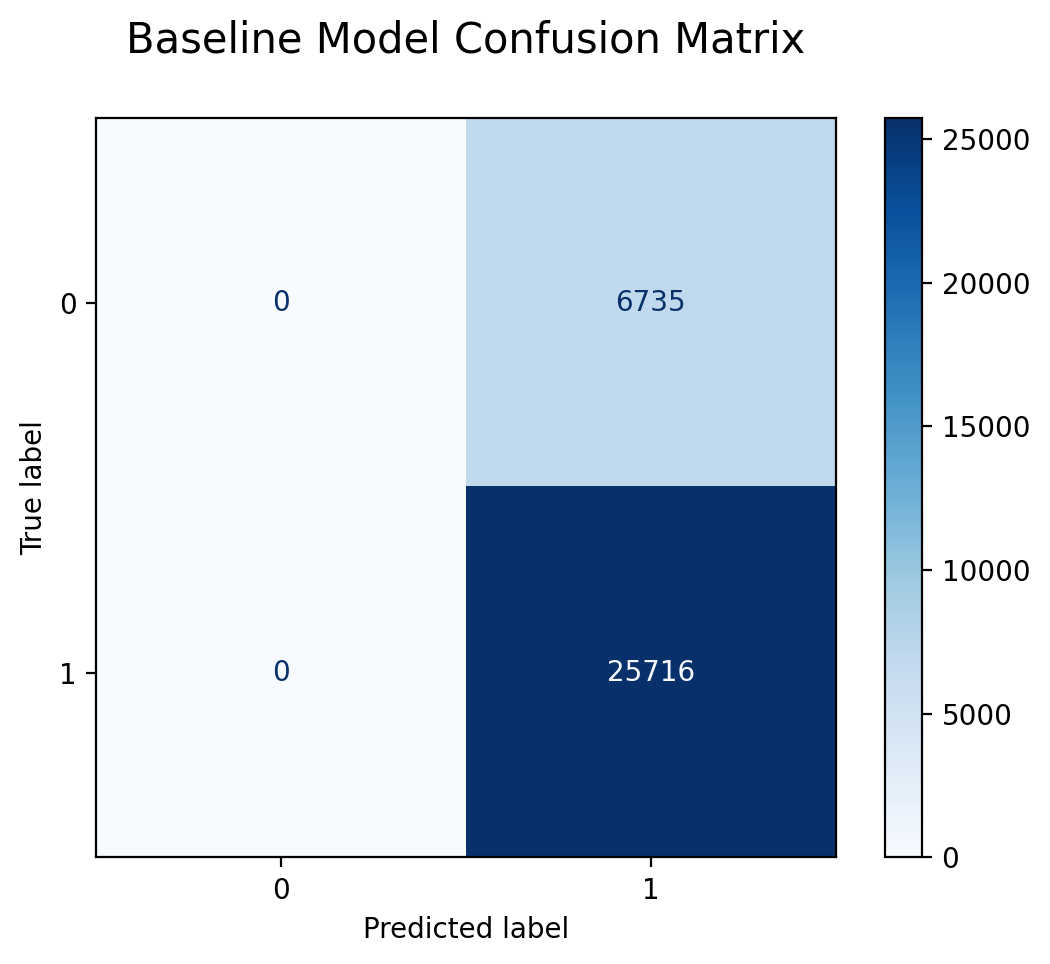

In [25]:
import warnings

# 모든 경고를 무시
warnings.filterwarnings("ignore")

# Classification report
print("훈련 정확도", accuracy_score(y_train, baseline))
print(
    classification_report(
        y_train, baseline)
    )

# Confusion matrix
cm = confusion_matrix(y_train, baseline)
disp = ConfusionMatrixDisplay(cm)
disp.plot(cmap='Blues')
plt.title("Baseline Model Confusion Matrix\n", size=15)
plt.show()

훈련 정확도:  1.0
검증 정확도:  0.9345494884752866
평가 정확도:  0.9387634355586234
              precision    recall  f1-score   support

           0       0.87      0.81      0.84      1684
           1       0.95      0.97      0.96      6429

    accuracy                           0.93      8113
   macro avg       0.91      0.89      0.90      8113
weighted avg       0.93      0.93      0.93      8113



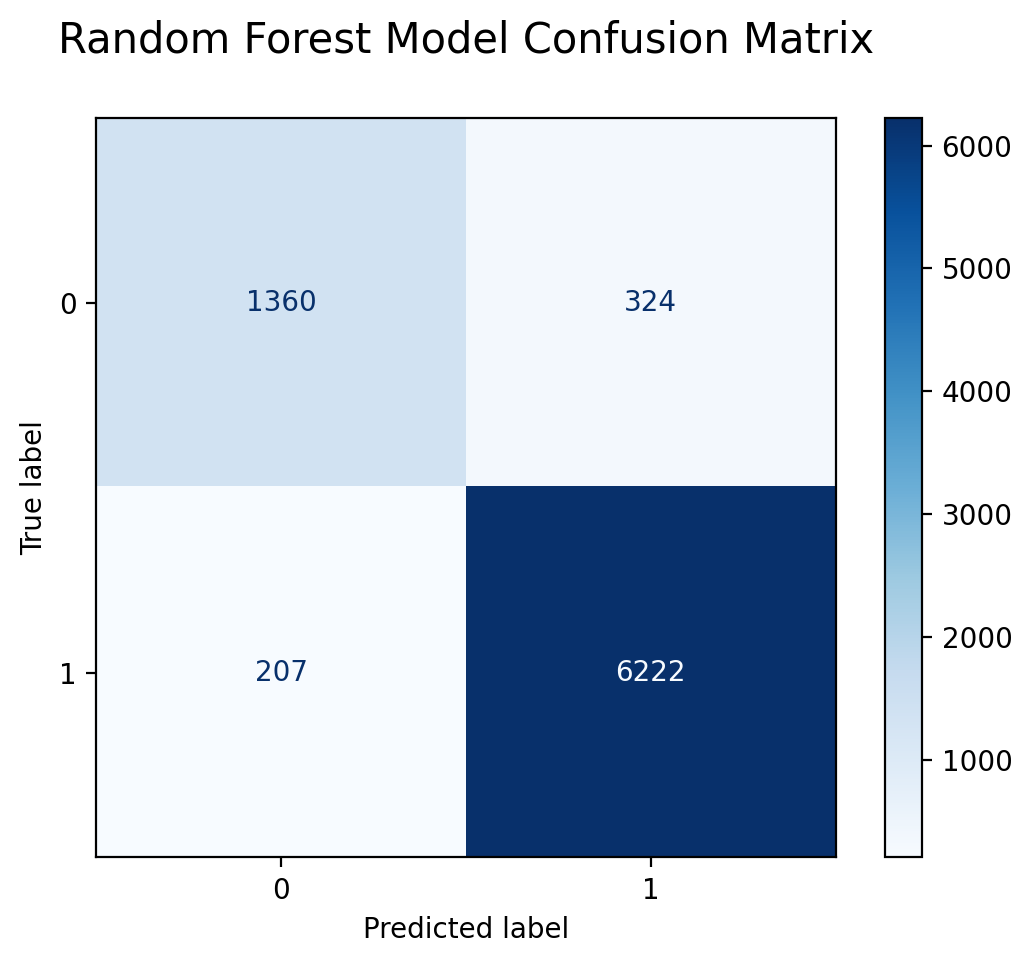

In [26]:
# RandomForest 모델 파이프라인 생성
pipe_rf = make_pipeline(OrdinalEncoder(),
                        SimpleImputer(),
                        RandomForestClassifier(random_state = 42)
)

# 모델 학습
pipe_rf.fit(X_train, y_train)

# 모델 검증
y_pred_val = pipe_rf.predict(X_val)

# 정확도 확인
print('훈련 정확도: ', pipe_rf.score(X_train, y_train))
print('검증 정확도: ', pipe_rf.score(X_val, y_val))
print('평가 정확도: ', pipe_rf.score(X_test, y_test))

# Classification report
print(
    classification_report(
        y_val, y_pred_val)
    )

# Confusion matrix
cm = confusion_matrix(y_val, y_pred_val)
disp = ConfusionMatrixDisplay(cm)
disp.plot(cmap='Blues')
plt.title("Random Forest Model Confusion Matrix\n", size=15)
plt.show()

훈련 정확도:  0.9749776586237712
검증 정확도:  0.9377542216196229
평가 정확도:  0.9404397988364067
              precision    recall  f1-score   support

           0       0.88      0.81      0.84      1684
           1       0.95      0.97      0.96      6429

    accuracy                           0.94      8113
   macro avg       0.92      0.89      0.90      8113
weighted avg       0.94      0.94      0.94      8113



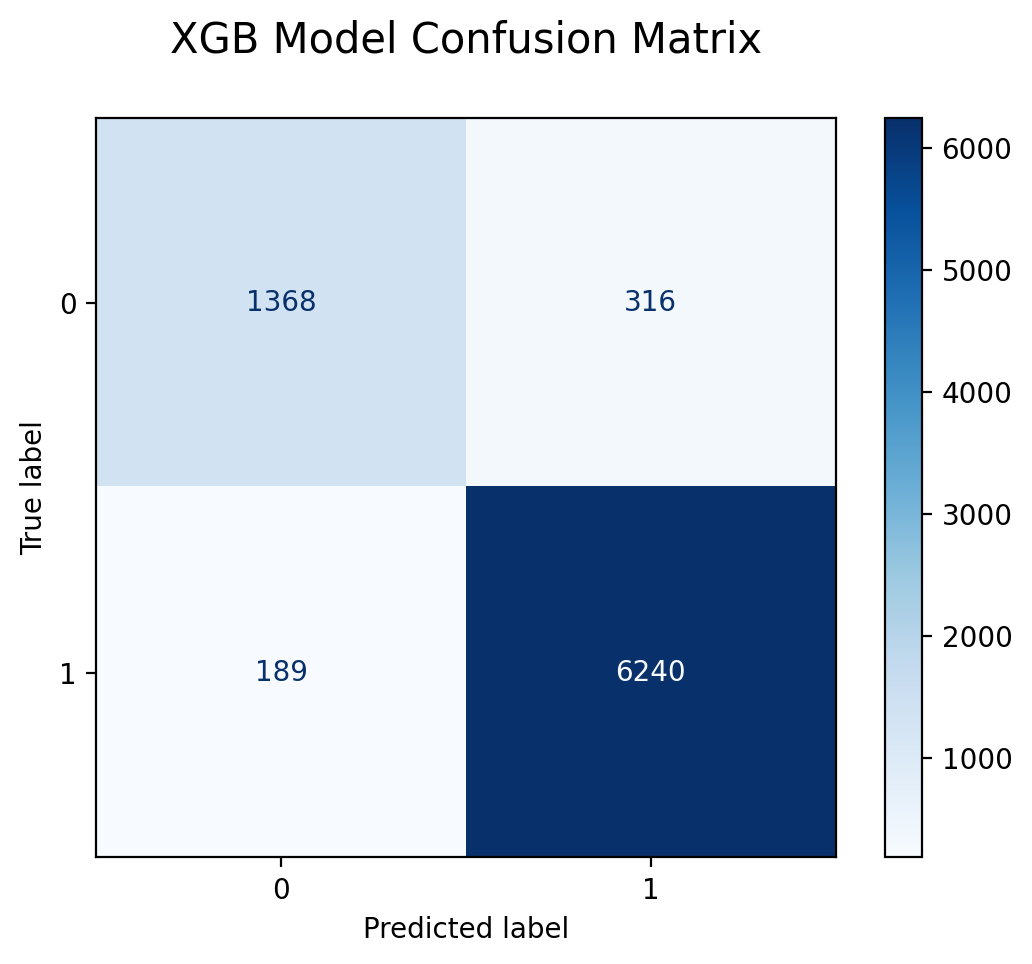

In [27]:
# XGB 모델 파이프라인 생성
pipe_xgb = make_pipeline(OrdinalEncoder(),
                        SimpleImputer(),
                        XGBClassifier(random_state = 42)
)

# 모델 학습
pipe_xgb.fit(X_train, y_train)

# 모델 검증
y_pred_val = pipe_xgb.predict(X_val)

# 정확도 확인
print('훈련 정확도: ', pipe_xgb.score(X_train, y_train))
print('검증 정확도: ', pipe_xgb.score(X_val, y_val))
print('평가 정확도: ', pipe_xgb.score(X_test, y_test))

# Classification report
print(
    classification_report(
        y_val, y_pred_val)
    )

# Confusion matrix
cm = confusion_matrix(y_val, y_pred_val)
disp = ConfusionMatrixDisplay(cm)
disp.plot(cmap='Blues')
plt.title("XGB Model Confusion Matrix\n", size=15)
plt.show()

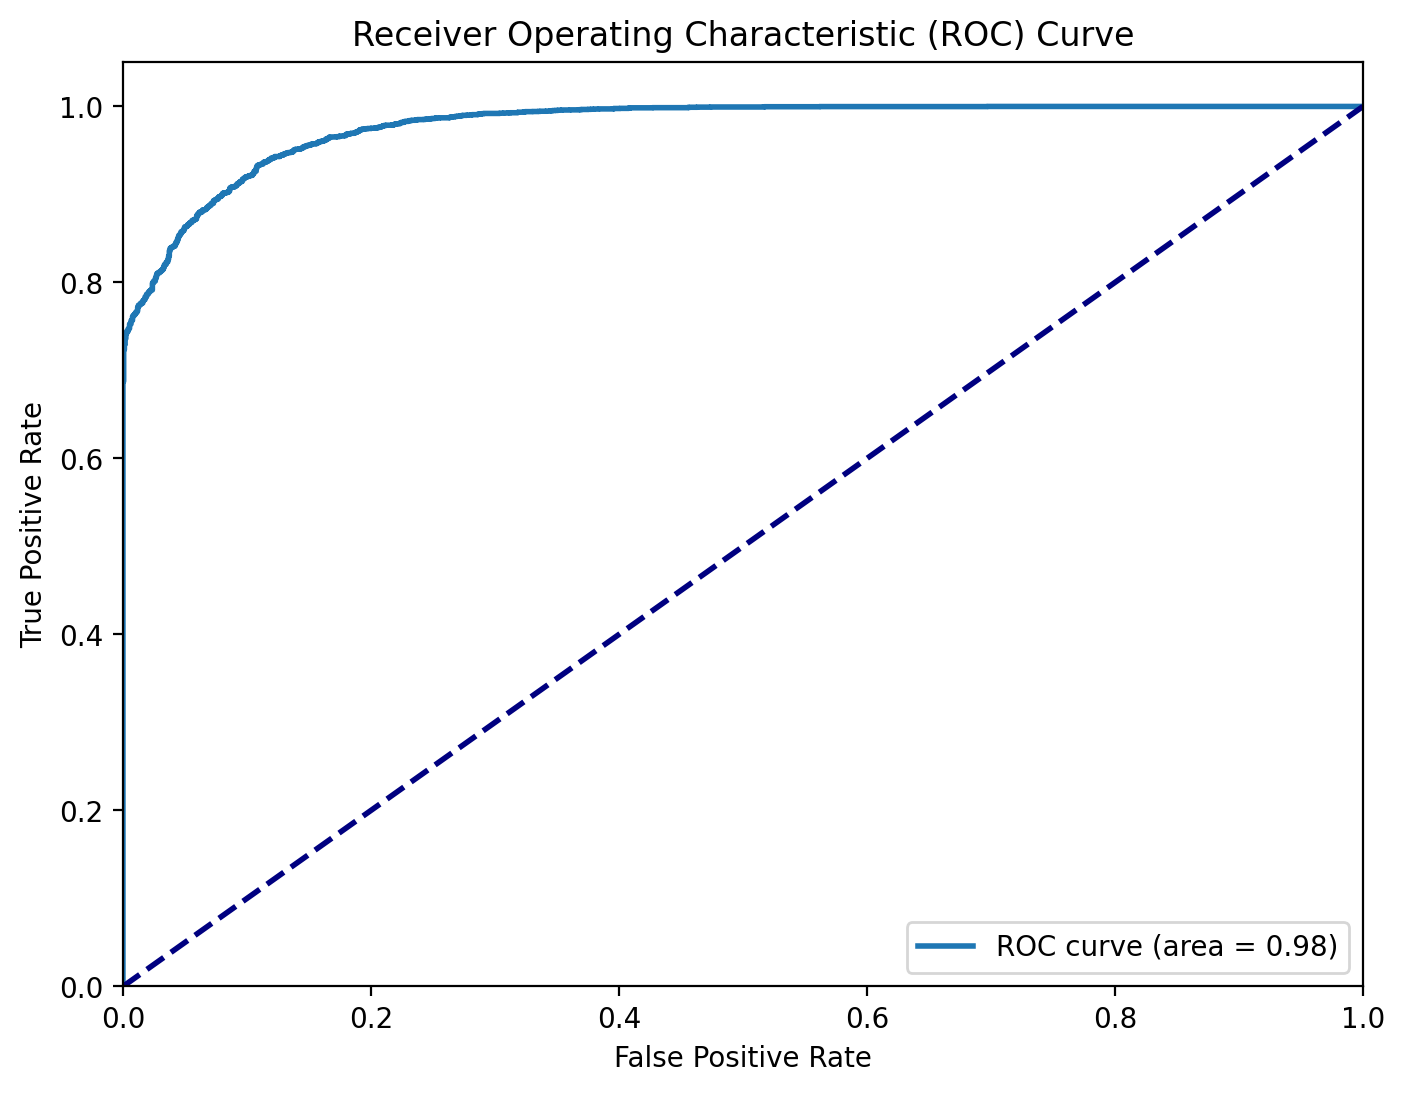

In [28]:
# 모델 검증
y_pred_val = pipe_xgb.predict(X_val)
y_pred_proba_val = pipe_xgb.predict_proba(X_val)[:, 1]  # 클래스 1에 대한 예측 확률 추출

# ROC 커브 생성
fpr, tpr, thresholds = roc_curve(y_val, y_pred_proba_val)

# ROC 커브 그리기
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, lw=2, label='ROC curve (area = %0.2f)' % roc_auc_score(y_val, y_pred_proba_val))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

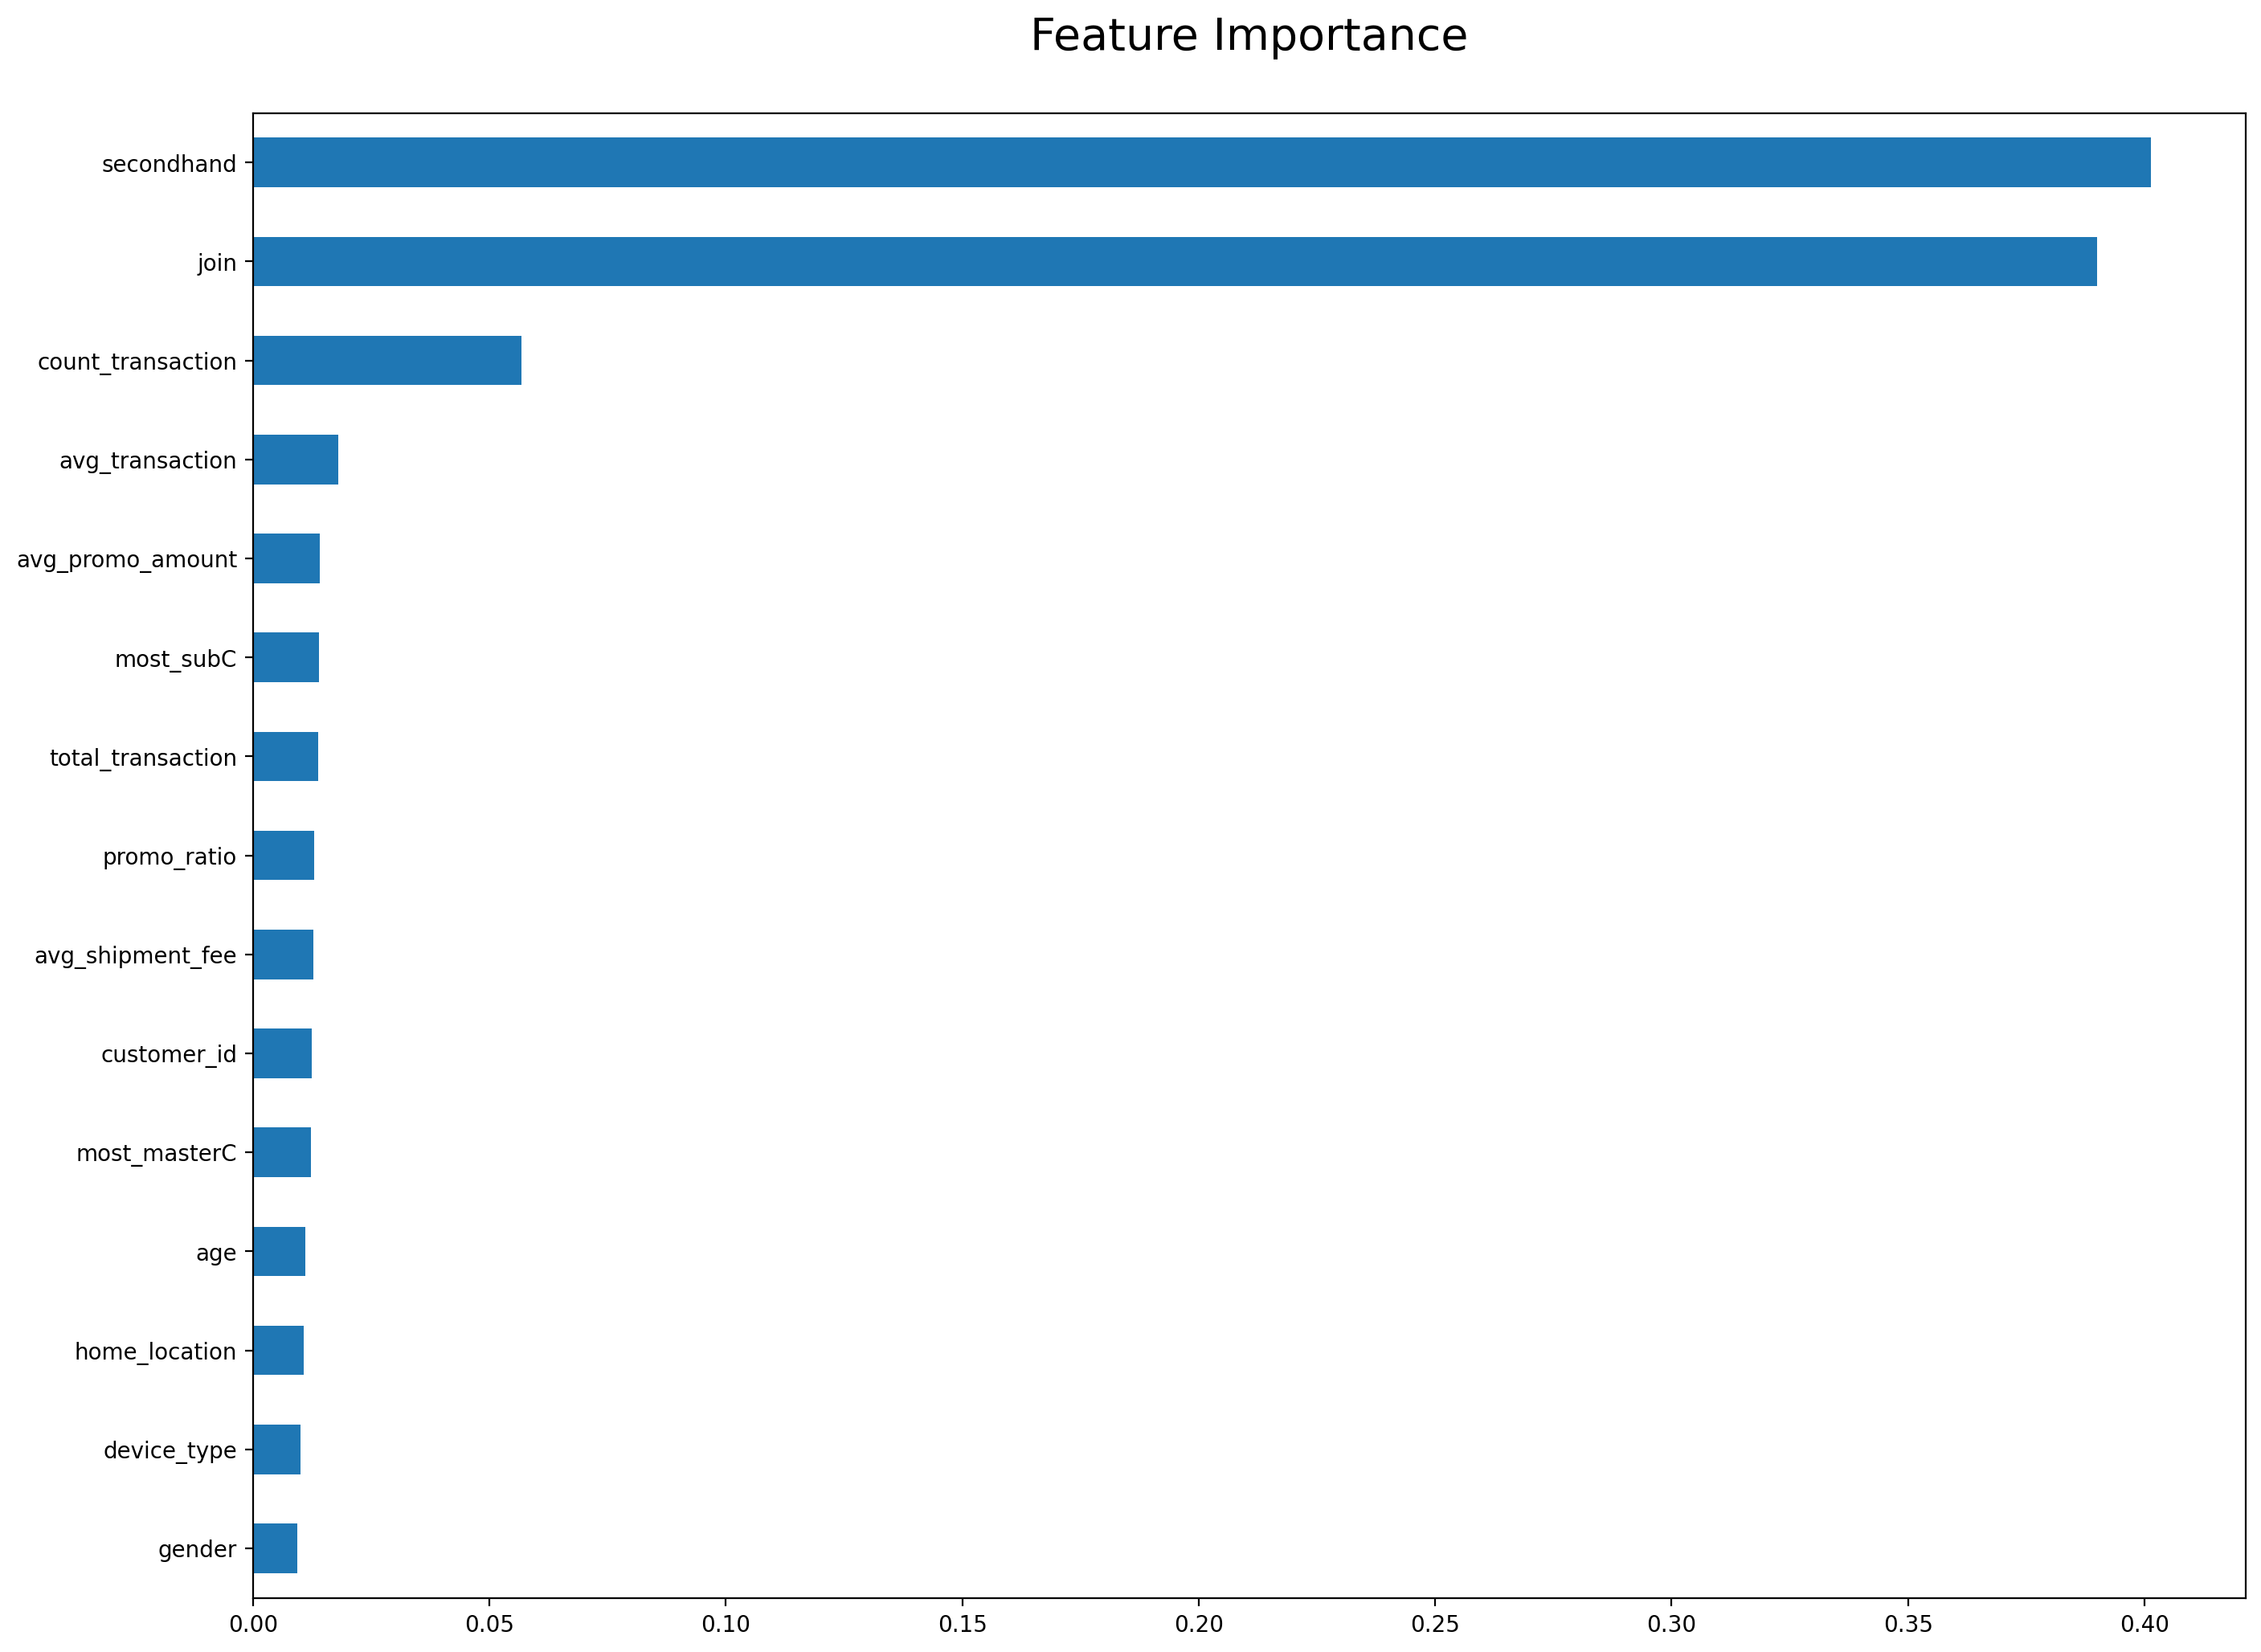

In [29]:
# 특성 중요도
xgb = pipe_xgb.named_steps["xgbclassifier"]
importances = pd.Series(xgb.feature_importances_, X_train.columns)
plt.figure(figsize=(16, 12))
importances.sort_values().plot.barh()
plt.title("Feature Importance\n", size=20)
plt.show()

In [30]:
from imblearn.pipeline import make_pipeline as make_pipeline_imb

pipe_xgb = make_pipeline_imb(OrdinalEncoder(),
                            SimpleImputer(),
                            SMOTE(random_state=42),
                            XGBClassifier(objective='binary:logistic',
                                      eval_metric='error',
                                      sampling_method='gradient_based',
                                      random_state=42,
                                      scale_pos_weight=(y_val == 0).sum() / (y_val == 1).sum()))

params = {
      "xgbclassifier__max_depth": [14, 15, 16],
      "xgbclassifier__learning_rate": [0.3, 0.35, 0.4],
      "xgbclassifier__n_estimators": [50, 60, 70]
    }

clf = GridSearchCV(
      pipe_xgb,
      param_grid=params,
      scoring="accuracy",
      cv=5,
      verbose=3,
    )

# 모델 학습
clf.fit(X_train, y_train)
print("Optimal Hyperparameters:", clf.best_params_)
clf

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV 1/5] END xgbclassifier__learning_rate=0.3, xgbclassifier__max_depth=14, xgbclassifier__n_estimators=50;, score=0.931 total time=  10.8s
[CV 2/5] END xgbclassifier__learning_rate=0.3, xgbclassifier__max_depth=14, xgbclassifier__n_estimators=50;, score=0.932 total time=  10.7s
[CV 3/5] END xgbclassifier__learning_rate=0.3, xgbclassifier__max_depth=14, xgbclassifier__n_estimators=50;, score=0.926 total time=  10.7s
[CV 4/5] END xgbclassifier__learning_rate=0.3, xgbclassifier__max_depth=14, xgbclassifier__n_estimators=50;, score=0.932 total time=   7.8s
[CV 5/5] END xgbclassifier__learning_rate=0.3, xgbclassifier__max_depth=14, xgbclassifier__n_estimators=50;, score=0.927 total time=  10.6s
[CV 1/5] END xgbclassifier__learning_rate=0.3, xgbclassifier__max_depth=14, xgbclassifier__n_estimators=60;, score=0.930 total time=  12.3s
[CV 2/5] END xgbclassifier__learning_rate=0.3, xgbclassifier__max_depth=14, xgbclassifier__n_estim

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('ordinalencoder', OrdinalEncoder()),
                                       ('simpleimputer', SimpleImputer()),
                                       ('smote', SMOTE(random_state=42)),
                                       ('xgbclassifier',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      callbacks=None,
                                                      colsample_bylevel=None,
                                                      colsample_bynode=None,
                                                      colsample_bytree=None,
                                                      early_stopping_rounds=None,
                                                      enable_categorical=False,
                                                      eval_metr...
                                                      max_delta_step=None,
                                                      max_depth=None,
                                                      max_leaves=None,
                                                      min_child_weight=None,
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      n_estimators=100,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      predictor=None,
                                                      random_state=42, ...))]),
             param_grid={'xgbclassifier__learning_rate': [0.3, 0.35, 0.4],
                         'xgbclassifier__max_depth': [14, 15, 16],
                         'xgbclassifier__n_estimators': [50, 60, 70]},
             scoring='accuracy', verbose=3)

              precision    recall  f1-score   support

           0       0.82      0.85      0.83      1684
           1       0.96      0.95      0.96      6429

    accuracy                           0.93      8113
   macro avg       0.89      0.90      0.89      8113
weighted avg       0.93      0.93      0.93      8113



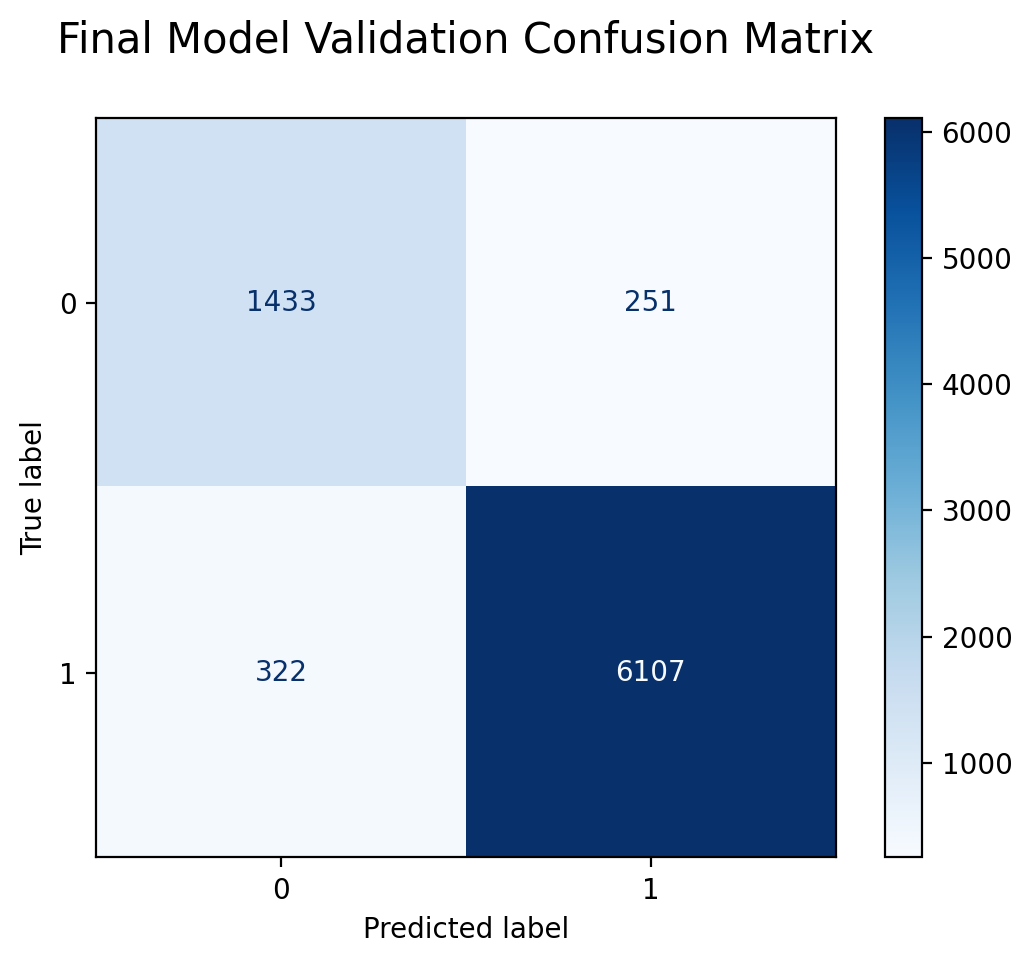

In [31]:
# thrshold 조정
threshold = 0.5

# 모델 검증
y_pred_proba = clf.predict_proba(X_val)[:, 1]
y_pred_val = (y_pred_proba > threshold).astype(int)

# Classification report
print(
    classification_report(
        y_val, y_pred_val)
    )

# Confusion matrix
cm = confusion_matrix(y_val, y_pred_val)
disp = ConfusionMatrixDisplay(cm)
disp.plot(cmap='Blues')
plt.title("Final Model Validation Confusion Matrix\n", size=15)
plt.show()

훈련 정확도:  0.9995993960124495
검증 정확도:  0.9293726118575126
평가 정확도:  0.9290010847056503
              precision    recall  f1-score   support

           0       0.82      0.85      0.83      1684
           1       0.96      0.95      0.96      6429

    accuracy                           0.93      8113
   macro avg       0.89      0.90      0.89      8113
weighted avg       0.93      0.93      0.93      8113



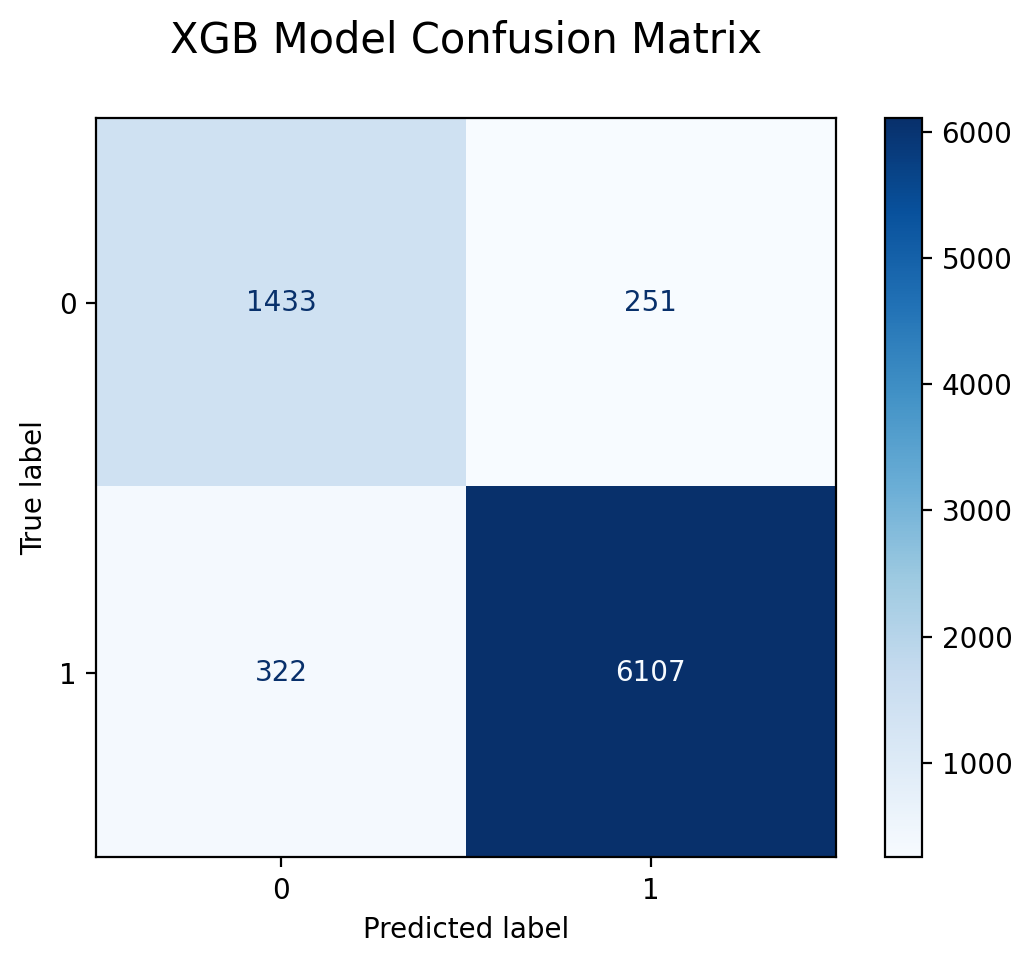

In [32]:
# XGB 최종 모델
final_xgb = make_pipeline_imb(OrdinalEncoder(),
                        SimpleImputer(),
                        SMOTE(random_state=42),
                        XGBClassifier(objective='binary:logistic',
                                      eval_metric='error',
                                      sampling_method='gradient_based',
                                      n_estimators=70,
                                      learning_rate=0.4,
                                      max_depth=15,
                                      scale_pos_weight=(y_val == 0).sum() / (y_val == 1).sum()))

# 모델 학습
final_xgb.fit(X_train, y_train)

# 모델 검증
y_pred_val = final_xgb.predict(X_val)

# 정확도 확인
print('훈련 정확도: ', final_xgb.score(X_train, y_train))
print('검증 정확도: ', final_xgb.score(X_val, y_val))
print('평가 정확도: ', final_xgb.score(X_test, y_test))

# Classification report
print(
    classification_report(
        y_val, y_pred_val)
    )

# Confusion matrix
cm = confusion_matrix(y_val, y_pred_val)
disp = ConfusionMatrixDisplay(cm)
disp.plot(cmap='Blues')
plt.title("XGB Model Confusion Matrix\n", size=15)
plt.show()